In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import scipy.spatial
import sklearn.metrics

In [1]:
def GetFeatureVector(modelNumber):
    feature_vectors = []
    for i in range(len(list_dir)):
        img1_path = 'C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/' + list_dir[i]
        var = DeepFace.represent(img1_path,model_name = modelsToCompute[modelNumber], enforce_detection = False,detector_backend='mtcnn')
        feature_vectors.append(var)
    return(feature_vectors)

NameError: name 'list_dir' is not defined

In [27]:
modelsToCompute = ["VGG-Face",
                   #"Facenet",
                   #"Facenet512", #0.66666
                   #"OpenFace",
                   #"DeepFace",
                   #"DeepID",
                   #"ArcFace",
                   #"SphereFace"]

In [28]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')
    


In [29]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/')

In [30]:
list_dir = list_dir[1:]

In [31]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

VGG-Face
0.3229166666666667
Facenet
0.6145833333333334
Facenet512
0.5833333333333333
OpenFace
0.5
DeepFace
0.6145833333333334
DeepID
0.65625
ArcFace
0.4166666666666667


ValueError: Invalid model_name passed - SphereFace

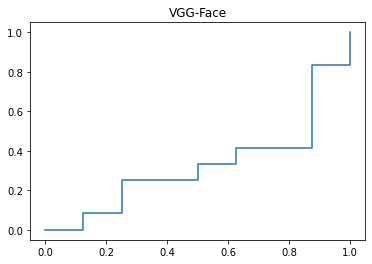

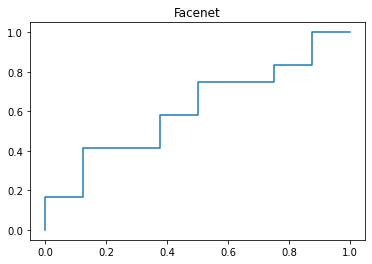

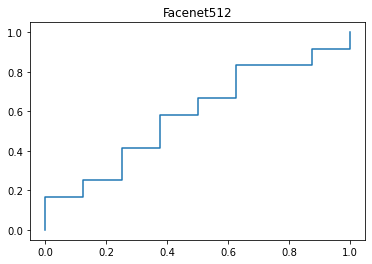

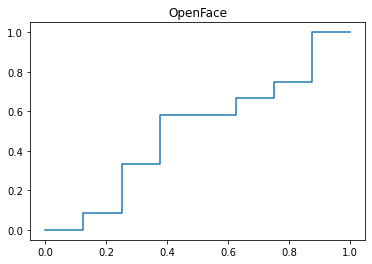

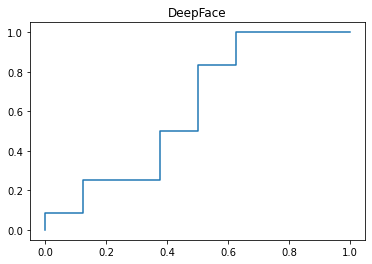

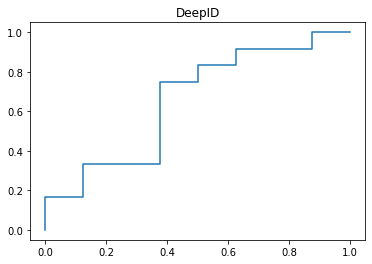

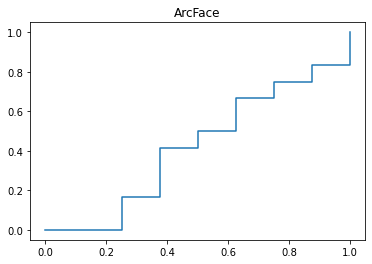

In [32]:
# modelsToCompute = ["VGG-Face",
#                    "Facenet",
#                    "Facenet512", #0.66666
#                    "OpenFace",
#                    "DeepFace",
#                    "DeepID",
#                    "ArcFace",
#                    "Dlib"]

for k in range(len(modelsToCompute)):
    # cOMPUTE FEATURE VECTORS
    feature_vectors = GetFeatureVector(k)

    # Compute euclidean distances
    euclidean_distances = []
    for i in range(0,40,2):
        var1 = scipy.spatial.distance.euclidean(feature_vectors[i],feature_vectors[i+1])
        euclidean_distances.append(var1)

    # Get Roc curve
    fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(euclidean_distances),pos_label='same')

    plt.figure()
    plt.plot(fpr,tpr)
    plt.title(modelsToCompute[k])

    print(modelsToCompute[k])
    print(sklearn.metrics.auc(fpr, tpr))